# IT Academy - Data Science with Python
## S12 T01: Supervised Regressions (In process, not finished yet)
### [Github Supervised Regressions](https://github.com/jesussantana/Supervised-Regression)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Regression.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Regression)

In [1]:
"""%pip install tabulate
%pip install scikit-optimize
%pip install fitter
%pip install missingno
%pip install lazypredict
%pip install pyforest"""

'%pip install tabulate\n%pip install scikit-optimize\n%pip install fitter\n%pip install missingno\n%pip install lazypredict\n%pip install pyforest'

In [2]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from pandas.plotting import scatter_matrix
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image

# Auto-training of classification and regression models
# ==============================================================================
import pyforest
from lazypredict.Supervised import LazyRegressor, LazyClassifier

from scipy.stats import loguniform

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import loguniform
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_regression

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances, accuracy_score

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.datasets import make_blobs

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

/home/jesus/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

### Exercise 1: 
  - Create at least three different regression models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Compare them based on MSE and R2.

### Exercise 3: 
  - Train them using the different parameters they support

### Exercise 4: 
  - Compare your performance using the traint / test approach or using all data (internal validation)

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [6]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [7]:
df = df_raw.loc[:,["ArrDelay","ArrTime","AirTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay","CarrierDelay", 'UniqueCarrier']]

In [8]:
#df = df_raw.loc[:,["ArrDelay","ArrTime","AirTime", "Distance", "TaxiIn", "TaxiOut", "DayOfWeek", "DepDelay","CarrierDelay"]]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ArrDelay       float64
 1   ArrTime        float64
 2   AirTime        float64
 3   Distance       int64  
 4   TaxiIn         float64
 5   TaxiOut        float64
 6   DayOfWeek      int64  
 7   DepDelay       float64
 8   CarrierDelay   float64
 9   UniqueCarrier  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 147.8+ MB


In [10]:
df.shape

(1936758, 10)

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.isna().sum().sort_values()

Distance              0
DayOfWeek             0
DepDelay              0
UniqueCarrier         0
TaxiOut             455
ArrTime            7110
TaxiIn             7110
ArrDelay           8387
AirTime            8387
CarrierDelay     689270
dtype: int64

- Sample Dataframe

In [13]:
df = df.sample(frac=0.0001, random_state = 6858)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 32721 to 79552
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ArrDelay       194 non-null    float64
 1   ArrTime        194 non-null    float64
 2   AirTime        194 non-null    float64
 3   Distance       194 non-null    int64  
 4   TaxiIn         194 non-null    float64
 5   TaxiOut        194 non-null    float64
 6   DayOfWeek      194 non-null    int64  
 7   DepDelay       194 non-null    float64
 8   CarrierDelay   131 non-null    float64
 9   UniqueCarrier  194 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 16.7+ KB


In [15]:
df.shape

(194, 10)

## Distribution of the response variable

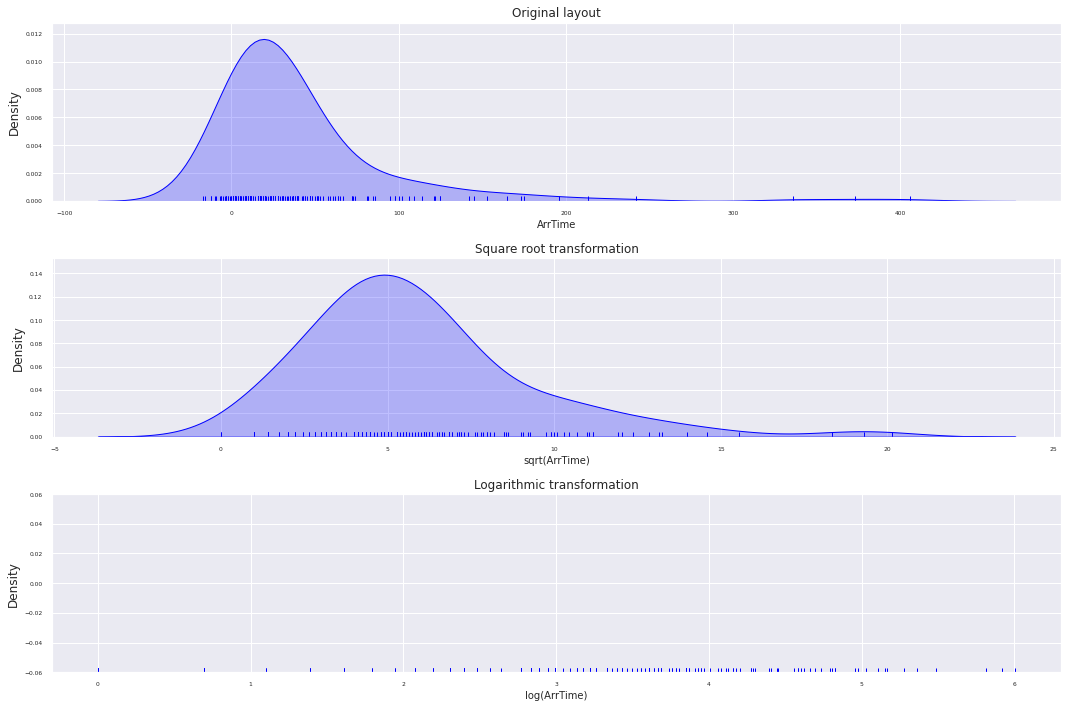

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.ArrDelay,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('ArrTime', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(ArrTime)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.ArrDelay),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(ArrTime)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

## Numerical variables

In [17]:
df.select_dtypes(include=['float64', 'int']).describe()

,ArrDelay,ArrTime,AirTime,Distance,TaxiIn,TaxiOut,DayOfWeek,DepDelay,CarrierDelay
count,194.00,194.00,194.00,194.00,194.00,194.00,194.00,194.00,131.00
mean,42.13,1654.38,108.55,780.93,6.79,17.04,4.01,45.11,18.83
std,60.08,525.22,71.67,621.30,4.76,10.61,2.05,57.99,47.27
min,-17.00,5.00,23.00,74.00,1.00,5.00,1.00,6.00,0.00
25%,10.00,1410.25,56.25,338.25,4.00,10.00,2.00,11.00,0.00
50%,25.00,1779.00,90.00,625.50,6.00,14.00,4.00,27.00,2.00
75%,47.75,2016.75,124.50,931.50,8.00,20.00,6.00,52.75,17.00
max,406.00,2352.00,350.00,2693.00,31.00,74.00,7.00,396.00,373.00


Text(0.5, 0.98, 'Distribution Numerical Variable')

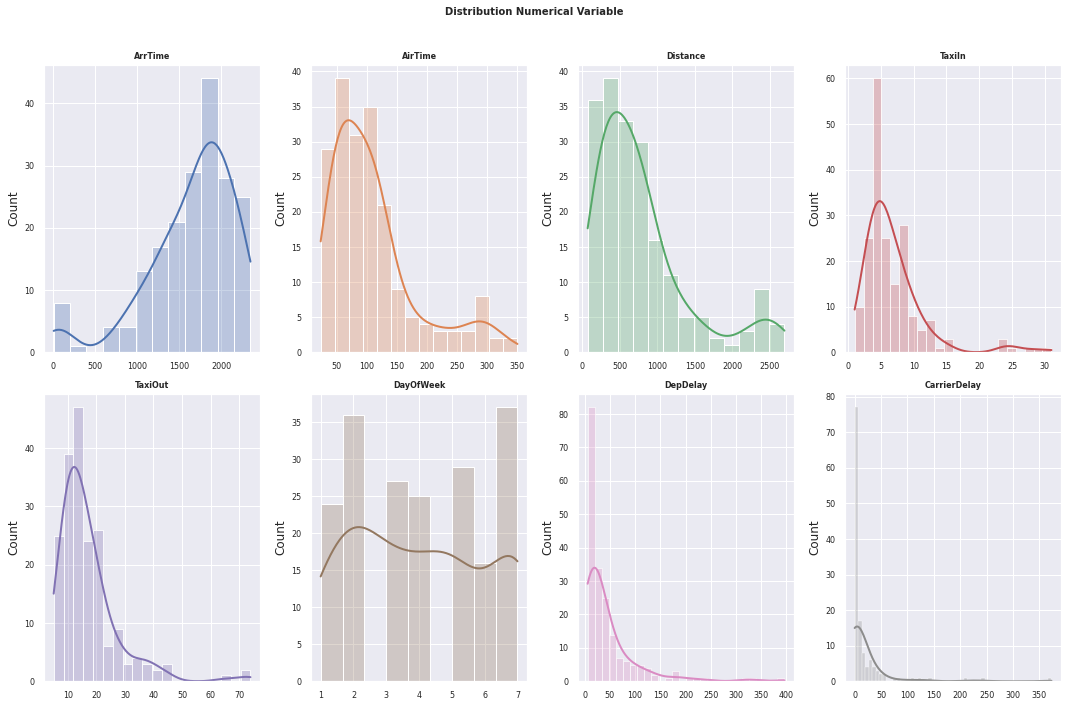

In [18]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 10, fontweight = "bold")

Text(0.5, 0.98, 'Correlation with ArrDelay')

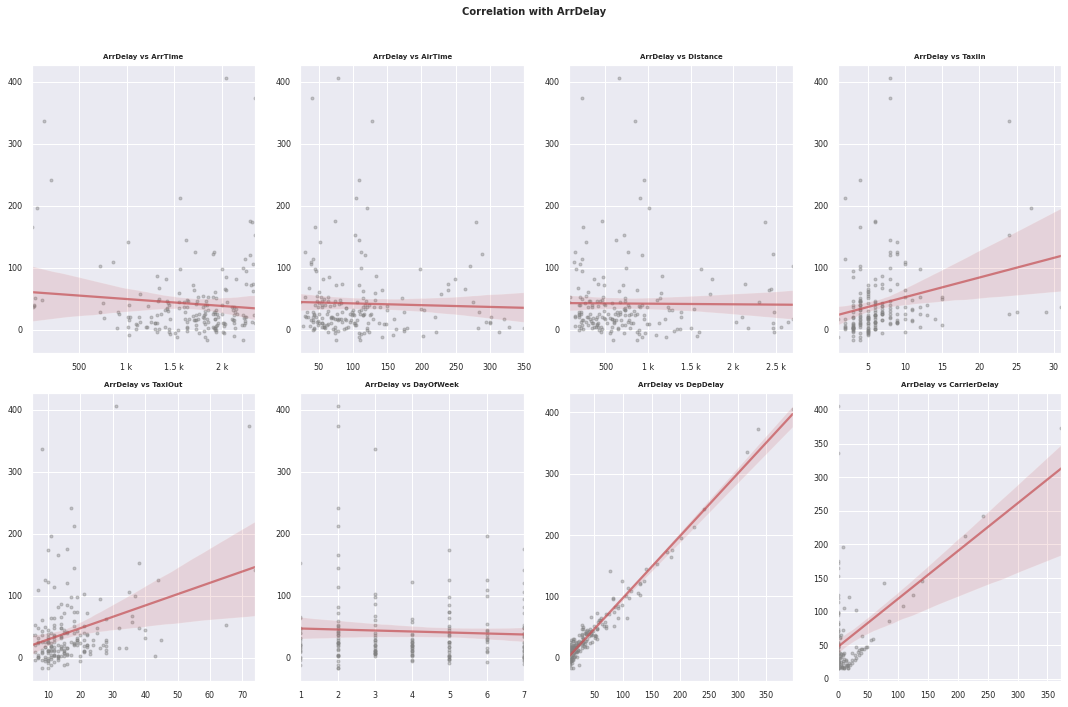

In [19]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('ArrDelay')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['ArrDelay'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with ArrDelay', fontsize = 10, fontweight = "bold")

## Numerical variables correlation

In [20]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
29,Distance,AirTime,0.98,0.98
21,AirTime,Distance,0.98,0.98
7,ArrDelay,DepDelay,0.98,0.98
63,DepDelay,ArrDelay,0.98,0.98
8,ArrDelay,CarrierDelay,0.52,0.52
72,CarrierDelay,ArrDelay,0.52,0.52
79,CarrierDelay,DepDelay,0.49,0.49
71,DepDelay,CarrierDelay,0.49,0.49
45,TaxiOut,ArrDelay,0.32,0.32
5,ArrDelay,TaxiOut,0.32,0.32


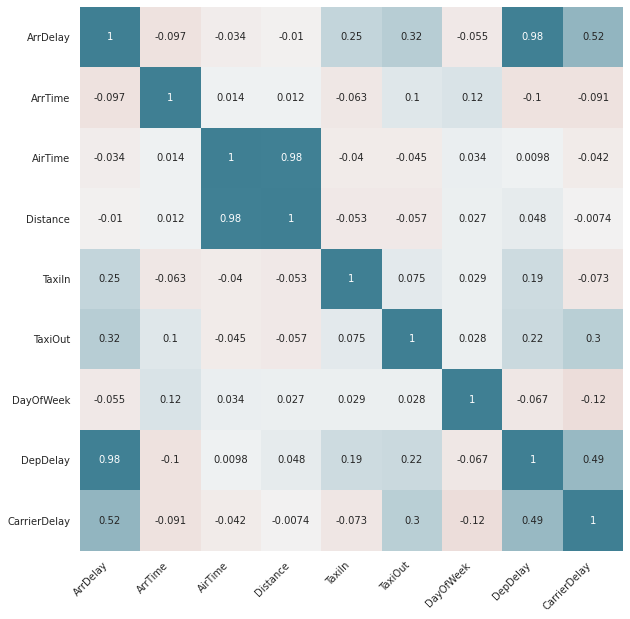

In [21]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

In [22]:
distributions = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']
fitter = Fitter(df.ArrTime, distributions=distributions)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
beta,0.00,1646.01,-3069.49,inf
powerlaw,0.00,1634.54,-3069.32,inf
logistic,0.00,1712.02,-3070.90,inf
cauchy,0.00,1733.65,-3067.32,inf
norm,0.00,1689.80,-3063.42,inf
gamma,0.00,1689.79,-3054.58,inf
chi2,0.00,1685.93,-3053.61,inf
expon,0.00,1627.93,-2960.79,inf
exponpow,0.00,inf,-2922.74,nan


## Qualitative variables

In [23]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes (include = ['object']). describe ()

,UniqueCarrier
count,194
unique,19
top,WN
freq,35


Text(0.5, 0.98, 'Qualitative variable distribution')

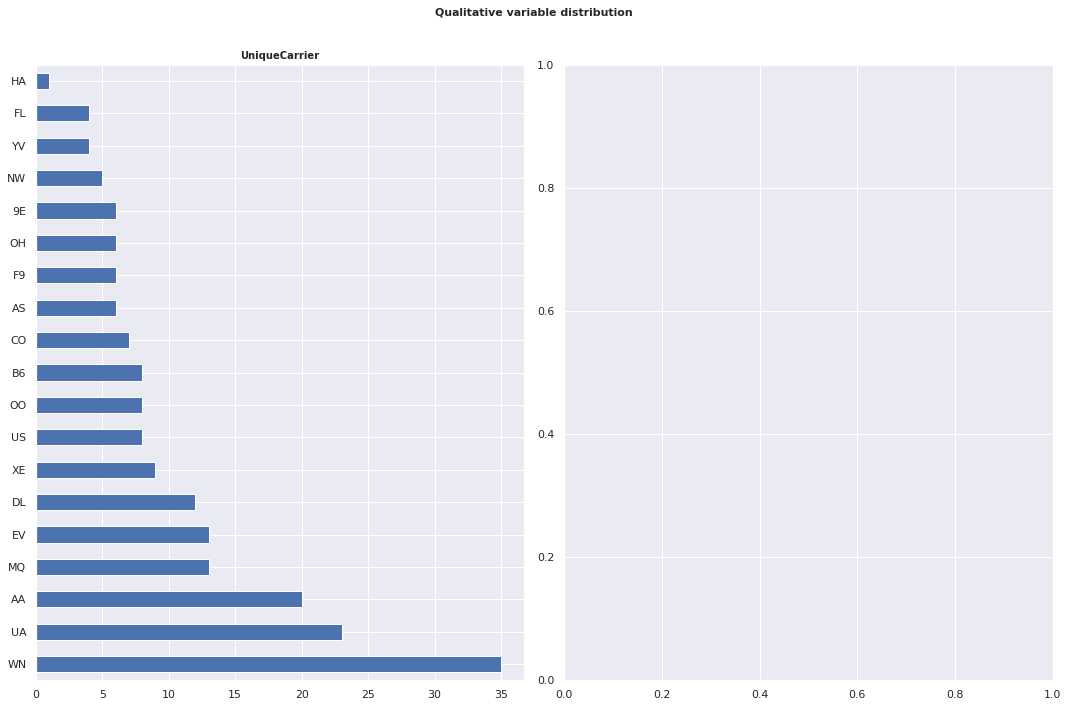

In [24]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 11, fontweight = "bold")

Text(0.5, 0.98, 'ArrDelay distribution by group')

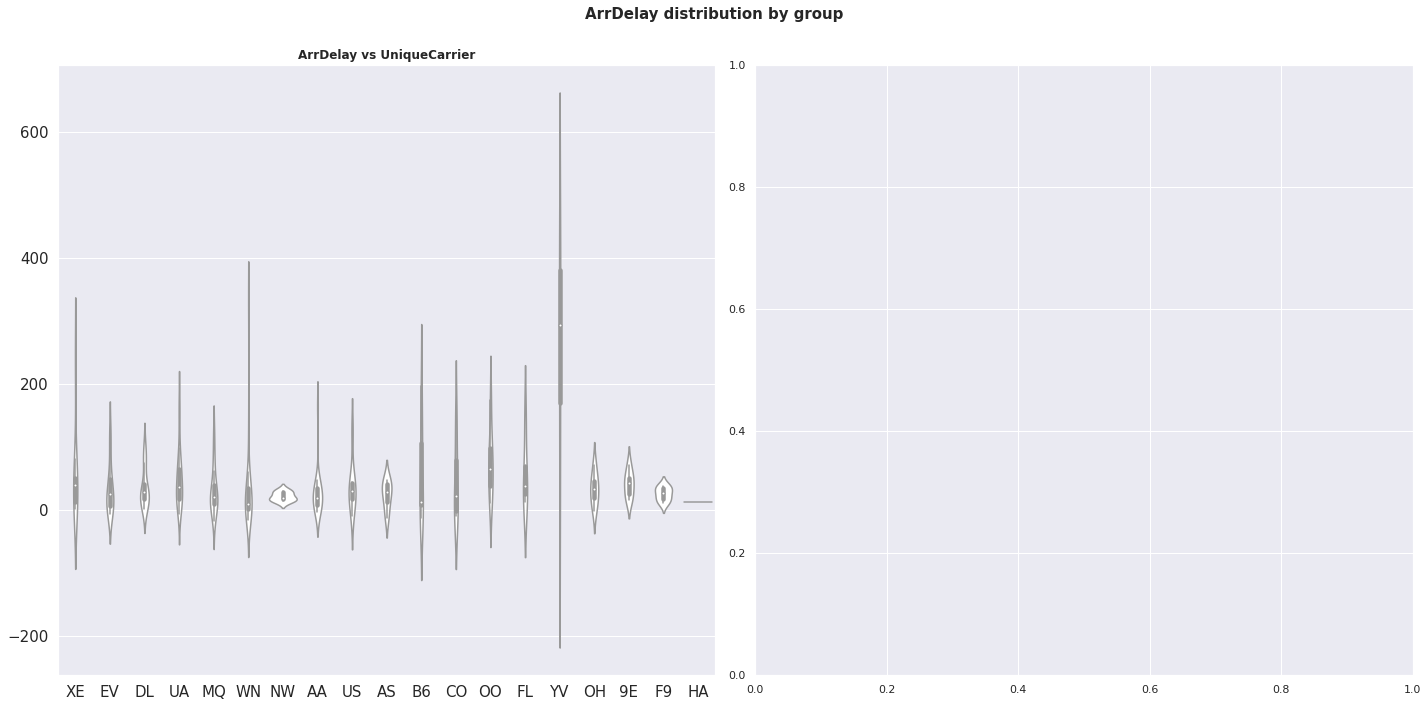

In [25]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'ArrDelay',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"ArrDelay vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 15)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 15, fontweight = "bold")

## Create Categorical Dummies

In [26]:
import categorical 

df = categorical.transform(df, "UniqueCarrier")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 32721 to 79552
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ArrDelay          194 non-null    float64
 1   ArrTime           194 non-null    float64
 2   AirTime           194 non-null    float64
 3   Distance          194 non-null    int64  
 4   TaxiIn            194 non-null    float64
 5   TaxiOut           194 non-null    float64
 6   DayOfWeek         194 non-null    int64  
 7   DepDelay          194 non-null    float64
 8   CarrierDelay      131 non-null    float64
 9   UniqueCarrier_9E  194 non-null    uint8  
 10  UniqueCarrier_AA  194 non-null    uint8  
 11  UniqueCarrier_AS  194 non-null    uint8  
 12  UniqueCarrier_B6  194 non-null    uint8  
 13  UniqueCarrier_CO  194 non-null    uint8  
 14  UniqueCarrier_DL  194 non-null    uint8  
 15  UniqueCarrier_EV  194 non-null    uint8  
 16  UniqueCarrier_F9  194 non-null    uint

## Imputation of missing values

In [28]:
df.isnull().sum().sum()

63

In [29]:
# Script created for transform missing data
# ===============================================================================
import missing

In [30]:
df[:] = missing.transform(df[:])

In [31]:
df.isnull().sum().sum()

0

In [32]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [33]:
df.isna().any()

ArrDelay            False
ArrTime             False
AirTime             False
Distance            False
TaxiIn              False
TaxiOut             False
DayOfWeek           False
DepDelay            False
CarrierDelay        False
UniqueCarrier_9E    False
UniqueCarrier_AA    False
UniqueCarrier_AS    False
UniqueCarrier_B6    False
UniqueCarrier_CO    False
UniqueCarrier_DL    False
UniqueCarrier_EV    False
UniqueCarrier_F9    False
UniqueCarrier_FL    False
UniqueCarrier_HA    False
UniqueCarrier_MQ    False
UniqueCarrier_NW    False
UniqueCarrier_OH    False
UniqueCarrier_OO    False
UniqueCarrier_UA    False
UniqueCarrier_US    False
UniqueCarrier_WN    False
UniqueCarrier_XE    False
UniqueCarrier_YV    False
dtype: bool

In [34]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

## Divide the data set into training set and test set

In [35]:
# Matrix
X = df.drop('ArrDelay', axis = 'columns')
# Vector
y = df['ArrDelay']


In [36]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6858)

## Checking if the training set was correcly splitted

In [37]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (155, 27) Target:  (155,)
Test set - Features:  (39, 27) Target:  (39,)


## Checking  Train, Test partition

In [38]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count   155.00
mean     39.44
std      54.23
min     -17.00
25%      10.00
50%      23.00
75%      47.00
max     373.00
Name: ArrDelay, dtype: float64


In [39]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count    39.00
mean     52.85
std      79.16
min     -16.00
25%      14.00
50%      30.00
75%      55.00
max     406.00
Name: ArrDelay, dtype: float64


##  Automate fit and evaluate all the models with LazyRegressor

In [40]:
# LazyRegressor Instance and fiting data

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)


 31%|███       | 13/42 [00:00<00:01, 24.37it/s]GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
 74%|███████▍  | 31/42 [00:06<00:01,  5.96it/s]PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
100%|██████████| 42/42 [00:07<00:00,  5.45it/s]


In [41]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HuberRegressor                               0.95       0.98  9.75        0.03
OrthogonalMatchingPursuitCV                  0.95       0.98  9.79        0.04
Lars                                         0.94       0.98  9.92        0.06
TransformedTargetRegressor                   0.94       0.98 10.03        0.01
LinearRegression                             0.94       0.98 10.03        0.01
RidgeCV                                      0.94       0.98 10.10        0.01
LassoCV                                      0.94       0.98 10.27        0.07
BayesianRidge                                0.94       0.98 10.49        0.02
Lasso                                        0.94       0.98 10.58        0.02
OrthogonalMatchingPursuit                    0.94       0.98 10.62        0.02
Ridge                                        0.94   


## Checking Score

In [42]:
# Evaluation Function
def rmse(model, y_test, y_pred, X_train, y_train):
    r_squared = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R-squared: ' + str(r_squared))
    print('Mean Squared Error: '+ str(rmse))

In [43]:
# Create model line scatter plot
def scatter_plot(y_test, y_pred, model_name):
    plt.figure(figsize=(10,6))
    sns.residplot(y_test, y_pred, lowess=True, color='#4682b4',
              line_kws={'lw': 2, 'color': 'r'})
    plt.title(str('Arr Time vs Residuals for \n' + model_name), fontsize=16)
    plt.xlabel('Arr Time',fontsize=16)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

In [44]:
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor

In [45]:
# Histogram-based Gradient Boosting Regression Tree
hist = HistGradientBoostingRegressor()
hist.fit(X_train, y_train)
y_pred = hist.predict(X_test)

In [46]:
rmse(hist, y_test, y_pred, X_train, y_train)

R-squared: 0.6265419733123578
Mean Squared Error: 47.75295826862649


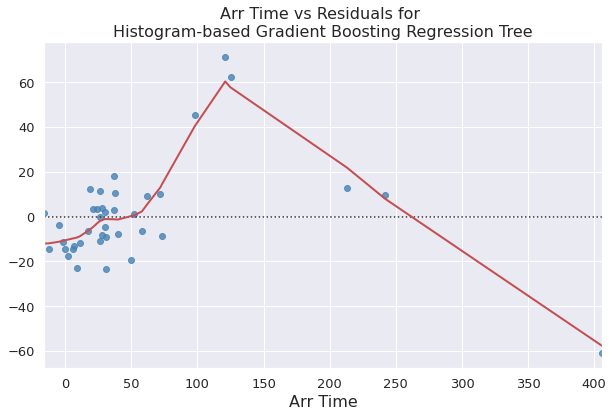

In [47]:
scatter_plot(y_test, y_pred, 'Histogram-based Gradient Boosting Regression Tree')

## Check Best Models to adjust parameter

In [48]:
print(models.head(10))

                             Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                       
HuberRegressor                             0.95       0.98  9.75        0.03
OrthogonalMatchingPursuitCV                0.95       0.98  9.79        0.04
Lars                                       0.94       0.98  9.92        0.06
TransformedTargetRegressor                 0.94       0.98 10.03        0.01
LinearRegression                           0.94       0.98 10.03        0.01
RidgeCV                                    0.94       0.98 10.10        0.01
LassoCV                                    0.94       0.98 10.27        0.07
BayesianRidge                              0.94       0.98 10.49        0.02
Lasso                                      0.94       0.98 10.58        0.02
OrthogonalMatchingPursuit                  0.94       0.98 10.62        0.02


## Huber Regressor

In [49]:
# random search linear regression model on the auto insurance dataset


from sklearn.linear_model import HuberRegressor


# define model
model = HuberRegressor()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
#space['solver'] = ['svd', 'cholesky', 'lsqr',‘sparse_cg’, 'sag', ‘saga’]
space['epsilon'] = loguniform(1e-5, 100)
space['alpha'] = loguniform(1e-5, 100)
space['warm_start'] = [True, False]
space['fit_intercept'] = [True, False]
space['tol'] = loguniform(1e-05, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#print('Accuracy: %s' % accuracy_score(y_test, y_pred))

Best Score: -7.805402954116006
Best Hyperparameters: {'alpha': 0.049582434730722026, 'epsilon': 1.51545415269362, 'fit_intercept': True, 'tol': 0.0006742524793323182, 'warm_start': False}


## Lars 

In [50]:
# random search Lars Regression model on the auto insurance dataset

from sklearn.linear_model import Lars


# define model
model = Lars()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['fit_intercept'] = [True, False]
space['verbose'] = [True, False]
space['normalize'] = [True, False]
space['precompute'] = [True, False]
space['n_nonzero_coefs'] = [500]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#print('Accuracy: %s' % accuracy_score(y_test, y_pred))

Best Score: -8.957898894260982
Best Hyperparameters: {'verbose': True, 'precompute': False, 'normalize': False, 'n_nonzero_coefs': 500, 'fit_intercept': True}


## OrthogonalMatchingPursuitCV

In [51]:
# random search OrthogonalMatchingPursuitCV regression model on the auto insurance dataset

from sklearn.linear_model import OrthogonalMatchingPursuitCV


# define model
model = OrthogonalMatchingPursuitCV()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['copy'] = [True, False]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['max_iter'] = [None]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#print('Accuracy: %s' % accuracy_score(y_test, y_pred))

Best Score: -7.613460190086477
Best Hyperparameters: {'normalize': True, 'max_iter': None, 'fit_intercept': True, 'copy': True}


## Ridge

In [52]:
# random search Ridge Regressormodel on the auto insurance dataset

from sklearn.linear_model import Ridge

# define model
model = Ridge()
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]
space['copy_X'] = [True, False]
space['max_iter'] = [None]
space['tol'] = [1e-3]
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#print('Accuracy: %s' % accuracy_score(y_test, y_pred))

Best Score: -7.3005667825105345
Best Hyperparameters: {'alpha': 11.030250411069028, 'copy_X': False, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'solver': 'cholesky', 'tol': 0.001}
